# Annual emissions broken down by sector

Here we can present the visualisations and discuss them. 

This page can be easily printed to a pdf using the buttons on the top right hand side of this web page.

This page is just a markdown file that has been slightly adapted to look nicer in Jupyter Books - e.g. removing the cell inputs/ outputs to only show the interactive graph below.

In [1]:
import pandas as pd
from itertools import takewhile
import plotly.graph_objects as go
import base64
import numpy as np
from dare_viz import path

In [2]:
xlsCH4 = pd.ExcelFile('data/GBR_2022_2020_10052022_142545.xlsx')
dfCH4 = pd.read_excel(xlsCH4, 'Table10s3', header=4)
dfCH4.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
dfCH4.dropna(inplace=True)

dfCH4.drop(
    labels = ["D.  Non-energy products from fuels and solvent use", "G.  Other product manufacture and use ", "C.  Rice cultivation", "D.  Agricultural soils", "E.  Prescribed burning of savannas", "F.  Other land", "E.  Other ","6.  Other (as specified in summary 1.A)", "International bunkers", "Navigation", "Multilateral operations",
 "Aviation"],
    axis=0,
    inplace = True
)
dfCH4.drop(
    labels = ["Base year(1)", "Change from base to latest reported year"],
    axis=1,
    inplace = True
)
#dfCH4

In [4]:
dfCH4_CO2_equ = dfCH4 / 1000 * 28
#dfCH4_CO2_equ

In [5]:
xlsN2O = pd.ExcelFile('data/GBR_2022_2020_10052022_142545.xlsx')
dfN2O = pd.read_excel(xlsN2O, 'Table10s4', header=4)
dfN2O.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
dfN2O.dropna(inplace=True)

dfN2O.drop(
    labels = ["D.  Non-energy products from fuels and solvent use",  "E.  Prescribed burning of savannas", "F.  Other land", "E.  Other ","6.  Other (as specified in summary 1.A)", "International bunkers", "Navigation", "Multilateral operations",
 "Aviation", "Indirect N2O", "H.  Other "],
    axis=0,
    inplace = True
)
dfN2O.drop(
    labels = ["Base year(1)", "Change from base to latest reported year"],
    axis=1,
    inplace = True
)
#dfN2O

In [6]:
dfN2O_CO2_equ = dfN2O / 1000 * 265
#dfN2O_CO2_equ

In [7]:
invent_fgas = pd.read_csv('data/UK_NIR_2022_co2e_all_gases_yearly.csv')
invent_fgas.set_index("year", inplace=True)
#invent_fgas

In [8]:
invent_fgas_1 = invent_fgas / 1000
invent_fgas_1["Total"] = invent_fgas_1.sum(axis=1)
invent_fgas_1.index = pd.to_datetime(invent_fgas_1.index, format='%Y')
#invent_fgas_1

In [10]:
hfc23 = pd.read_csv('data/UK_NIR_2022_HFC-23.csv')
hfc23.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
hfc23.fillna(0, inplace=True)
#hfc23

hfc32 = pd.read_csv('data/UK_NIR_2022_HFC-32.csv')
hfc32.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
hfc32.fillna(0, inplace=True)
#hfc32

hfc4310mee = pd.read_csv('data/UK_NIR_2022_HFC-43-10mee.csv')
hfc4310mee.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
hfc4310mee.replace("NA,NO", 0, inplace=True)
#hfc4310mee.fillna(0, inplace=True)
#hfc4310mee

hfc125 = pd.read_csv('data/UK_NIR_2022_HFC-125.csv')
hfc125.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
#hfc125.replace("NA,NO", 0, inplace=True)
hfc125.fillna(0, inplace=True)
#hfc125

hfc134a = pd.read_csv('data/UK_NIR_2022_HFC-134a.csv')
hfc134a.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
#hfc134a.replace("NA,NO", 0, inplace=True)
hfc134a.fillna(0, inplace=True)
#hfc134a

hfc143a = pd.read_csv('data/UK_NIR_2022_HFC-143a.csv')
hfc143a.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
#hfc143a.replace("NA,NO", 0, inplace=True)
hfc143a.fillna(0, inplace=True)
#hfc143a

hfc152a = pd.read_csv('data/UK_NIR_2022_HFC-152a.csv')
hfc152a.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
#hfc152a.replace("NA,NO", 0, inplace=True)
hfc152a.fillna(0, inplace=True)
#hfc152a

hfc227ea = pd.read_csv('data/UK_NIR_2022_HFC-227ea.csv')
hfc227ea.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
#hfc227ea.replace("NA,NO", 0, inplace=True)
hfc227ea.fillna(0, inplace=True)
#hfc227ea

hfc245fa = pd.read_csv('data/UK_NIR_2022_HFC-245fa.csv')
hfc245fa.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
#hfc245fa.replace("NA,NO", 0, inplace=True)
hfc245fa.fillna(0, inplace=True)
#hfc245fa

hfc365mfc = pd.read_csv('data/UK_NIR_2022_HFC-365mfc.csv')
hfc365mfc.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
#hfc365mfc.replace("NA,NO", 0, inplace=True)
hfc365mfc.fillna(0, inplace=True)
#hfc365mfc

In [11]:
hfc23.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *12690# + (hfc32.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *705) + (hfc4310mee.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *1470) + (hfc125.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *3450) + (hfc134a.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *1360) + (hfc143a.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *5080) + (hfc152a.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *148) + (hfc227ea.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *3140) + (hfc245fa.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *880) + (hfc365mfc.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *810)

1990         0.0
1991         0.0
1992         0.0
1993         0.0
1994         0.0
1995         0.0
1996         0.0
1997         0.0
1998         0.0
1999         0.0
2000         0.0
2001         0.0
2002         0.0
2003         0.0
2004         0.0
2005         0.0
2006         0.0
2007         0.0
2008         0.0
2009         0.0
2010         0.0
2011         0.0
2012         0.0
2013         0.0
2014         0.0
2015         0.0
2016         0.0
2017    0.012827
2018     0.08987
2019    0.013735
2020    0.013735
Name: F.  Product uses as substitutes for ODS(2), dtype: object

In [11]:
test_ODS = (hfc23.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *14800) + (hfc32.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *675) + (hfc4310mee.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *1640) + (hfc125.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *3500) + (hfc134a.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *1430) + (hfc143a.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *4470) + (hfc152a.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *124) + (hfc227ea.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *3220) + (hfc245fa.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *1030) + (hfc365mfc.loc["F.  Product uses as substitutes for ODS(2)"] / 1000 *794)
#test_ODS

df_test = pd.DataFrame(test_ODS)
df_test.set_index(pd.to_datetime(df_test.index, format='%Y'), inplace=True)

df_test["ODS"] = df_test["F.  Product uses as substitutes for ODS(2)"] / 1000
df_test["Total"] = invent_fgas_1["Total"]
#df_test

In [11]:
#test2 = pd.read_csv(r'C:\Users\amar1\UNFCCC_data_local\2022\processed_data\totals\UK_NIR_2022_all_gases_yearly.csv')
#test2.set_index("year", inplace=True)
#test2.set_index(pd.to_datetime(test2.index, format='%Y'), inplace=True)
#test2["Total"] = test2.sum(axis=1)
#test2

In [12]:
#test2["ODS"] = df_test["F.  Product uses as substitutes for ODS(2)"]
#test2
#fgas_fraction = test2["ODS"] / test2["Total"]
#fgas_fraction

In [12]:
def read_intem(species):

    fname = path() / f"data/intem/Table_UK_2021_{species}.txt"

    with open(fname, "r") as f:
        headiter = takewhile(lambda s: s.startswith('#'), f)
        header = list(headiter)

    df = pd.read_csv(fname,
                    sep=",",
                    skipinitialspace=True,
                    index_col="Year",
                    comment="#")

    df = df.apply(pd.to_numeric, errors='ignore')
    df.index = pd.to_datetime(df.index, format='%Y')
    df.rename(columns = {"Invent2021": "Invent"}, inplace=True)

    for h in header:
        if "GAS" in h:
            species_str = h.split(":")[1].strip()
        if "UNITS" in h:
            species_units = h.split(":")[1].strip()
        if "GWP" in h:
            species_gwp = float(h.split(":")[1].strip())
    
    return df, species_str, species_units, species_gwp

In [13]:
df_ch4, _, _, _ = read_intem("ch4")
df_n2o, _, _, _ = read_intem("n2o")
#df_ch4

In [14]:
# Get F-gases
fgas = [f"hfc{hfc}" for hfc in ["23", "32", "125", "134a", "143a", "152a", "227ea", "245fa", "365mfc", "4310mee"]] + \
    [f"pfc{pfc}" for pfc in ["14", "116", "218", "318"]] + \
    ["sf6"]

df_fgas, _, _, _ = read_intem(fgas[0])

uncert = df_fgas["InTEM_std"]**2

for fg in fgas[1:]:
    dfs, _, _, _ = read_intem(fg)
    df_fgas += dfs
    uncert += df_fgas["InTEM_std"]**2

df_fgas["InTEM_std"] = np.sqrt(uncert.values)

In [15]:
df_fgas["InTEM_ODS"] = (df_test["ODS"] / df_test["Total"]) * df_fgas["InTEM"]
df_fgas["InTEM_ODS_std"] = (df_test["ODS"] / df_test["Total"]) * df_fgas["InTEM_std"]
#df_fgas

In [16]:
energy_ch4_fraction = pd.DataFrame(dfCH4_CO2_equ.loc["1. Energy"] / dfCH4_CO2_equ.loc["Total CH4 emissions with CH4 from LULUCF"], columns=["Energy_Fraction"])
energy_ch4_fraction.index = pd.to_datetime(energy_ch4_fraction.index, format='%Y')
#energy_n2o_fraction

industry_ch4_fraction = pd.DataFrame(dfCH4_CO2_equ.loc["2.  Industrial processes"] / dfCH4_CO2_equ.loc["Total CH4 emissions with CH4 from LULUCF"], columns=["Industry_Fraction"])
industry_ch4_fraction.index = pd.to_datetime(industry_ch4_fraction.index, format='%Y')
#industry_n2o_fraction

agri_ch4_fraction = pd.DataFrame(dfCH4_CO2_equ.loc["3.  Agriculture"] / dfCH4_CO2_equ.loc["Total CH4 emissions with CH4 from LULUCF"], columns=["Agri_Fraction"])
agri_ch4_fraction.index = pd.to_datetime(agri_ch4_fraction.index, format='%Y')
#agri_n2o_fraction

lulucf_ch4_fraction = pd.DataFrame(dfCH4_CO2_equ.loc["4. Land use, land-use change and forestry"] / dfCH4_CO2_equ.loc["Total CH4 emissions with CH4 from LULUCF"], columns=["LULUCF_Fraction"])
lulucf_ch4_fraction.index = pd.to_datetime(lulucf_ch4_fraction.index, format='%Y')
#lulucf_n2o_fraction

waste_ch4_fraction = pd.DataFrame(dfCH4_CO2_equ.loc["5.  Waste"] / dfCH4_CO2_equ.loc["Total CH4 emissions with CH4 from LULUCF"], columns=["Waste_Fraction"])
waste_ch4_fraction.index = pd.to_datetime(waste_ch4_fraction.index, format='%Y')
#waste_n2o_fraction

In [17]:
frames = [energy_ch4_fraction, industry_ch4_fraction, agri_ch4_fraction, lulucf_ch4_fraction, waste_ch4_fraction, df_ch4]
df_ch4_new = pd.concat(frames, axis=1).reindex(df_n2o.index)

df_ch4_new["InTEM_Energy"] = df_ch4_new["InTEM"] *df_ch4_new["Energy_Fraction"]
df_ch4_new["InTEM_Energy_std"] = df_ch4_new["InTEM_std"] *df_ch4_new["Energy_Fraction"]

df_ch4_new["InTEM_Industry"] = df_ch4_new["InTEM"] *df_ch4_new["Industry_Fraction"]
df_ch4_new["InTEM_Industry_std"] = df_ch4_new["InTEM_std"] *df_ch4_new["Industry_Fraction"]

df_ch4_new["InTEM_Agriculture"] = df_ch4_new["InTEM"] *df_ch4_new["Agri_Fraction"]
df_ch4_new["InTEM_Agriculture_std"] = df_ch4_new["InTEM_std"] *df_ch4_new["Agri_Fraction"]

df_ch4_new["InTEM_LULUCF"] = df_ch4_new["InTEM"] *df_ch4_new["LULUCF_Fraction"]
df_ch4_new["InTEM_LULUCF_std"] = df_ch4_new["InTEM_std"] *df_ch4_new["LULUCF_Fraction"]

df_ch4_new["InTEM_Waste"] = df_ch4_new["InTEM"] *df_ch4_new["Waste_Fraction"]
df_ch4_new["InTEM_Waste_std"] = df_ch4_new["InTEM_std"] *df_ch4_new["Waste_Fraction"]

#df_ch4_new

In [18]:
energy_n2o_fraction = pd.DataFrame(dfN2O_CO2_equ.loc["1. Energy"] / dfN2O_CO2_equ.loc["Total direct N2O emissions with N2O from LULUCF"], columns=["Energy_Fraction"])
energy_n2o_fraction.index = pd.to_datetime(energy_n2o_fraction.index, format='%Y')
#energy_n2o_fraction

industry_n2o_fraction = pd.DataFrame(dfN2O_CO2_equ.loc["2.  Industrial processes"] / dfN2O_CO2_equ.loc["Total direct N2O emissions with N2O from LULUCF"], columns=["Industry_Fraction"])
industry_n2o_fraction.index = pd.to_datetime(industry_n2o_fraction.index, format='%Y')
#industry_n2o_fraction

agri_n2o_fraction = pd.DataFrame(dfN2O_CO2_equ.loc["3.  Agriculture"] / dfN2O_CO2_equ.loc["Total direct N2O emissions with N2O from LULUCF"], columns=["Agri_Fraction"])
agri_n2o_fraction.index = pd.to_datetime(agri_n2o_fraction.index, format='%Y')
#agri_n2o_fraction

lulucf_n2o_fraction = pd.DataFrame(dfN2O_CO2_equ.loc["4. Land use, land-use change and forestry"] / dfN2O_CO2_equ.loc["Total direct N2O emissions with N2O from LULUCF"], columns=["LULUCF_Fraction"])
lulucf_n2o_fraction.index = pd.to_datetime(lulucf_n2o_fraction.index, format='%Y')
#lulucf_n2o_fraction

waste_n2o_fraction = pd.DataFrame(dfN2O_CO2_equ.loc["5.  Waste"] / dfN2O_CO2_equ.loc["Total direct N2O emissions with N2O from LULUCF"], columns=["Waste_Fraction"])
waste_n2o_fraction.index = pd.to_datetime(waste_n2o_fraction.index, format='%Y')
#waste_n2o_fraction

In [19]:
frames = [energy_n2o_fraction, industry_n2o_fraction, agri_n2o_fraction, lulucf_n2o_fraction, waste_n2o_fraction, df_n2o]
df_n2o_new = pd.concat(frames, axis=1).reindex(df_n2o.index)

df_n2o_new["InTEM_Energy"] = df_n2o_new["InTEM"] *df_n2o_new["Energy_Fraction"]
df_n2o_new["InTEM_Energy_std"] = df_n2o_new["InTEM_std"] *df_n2o_new["Energy_Fraction"]

df_n2o_new["InTEM_Industry"] = df_n2o_new["InTEM"] *df_n2o_new["Industry_Fraction"]
df_n2o_new["InTEM_Industry_std"] = df_n2o_new["InTEM_std"] *df_n2o_new["Industry_Fraction"]

df_n2o_new["InTEM_Agriculture"] = df_n2o_new["InTEM"] *df_n2o_new["Agri_Fraction"]
df_n2o_new["InTEM_Agriculture_std"] = df_n2o_new["InTEM_std"] *df_n2o_new["Agri_Fraction"]

df_n2o_new["InTEM_LULUCF"] = df_n2o_new["InTEM"] *df_n2o_new["LULUCF_Fraction"]
df_n2o_new["InTEM_LULUCF_std"] = df_n2o_new["InTEM_std"] *df_n2o_new["LULUCF_Fraction"]

df_n2o_new["InTEM_Waste"] = df_n2o_new["InTEM"] *df_n2o_new["Waste_Fraction"]
df_n2o_new["InTEM_Waste_std"] = df_n2o_new["InTEM_std"] *df_n2o_new["Waste_Fraction"]

#df_n2o_new

In [20]:
energy_both = dfN2O_CO2_equ.loc["1. Energy"] + dfCH4_CO2_equ.loc["1. Energy"]
industrial_both = dfN2O_CO2_equ.loc["2.  Industrial processes"] + dfCH4_CO2_equ.loc["2.  Industrial processes"]
agricultural_both = dfN2O_CO2_equ.loc["3.  Agriculture"] + dfCH4_CO2_equ.loc["3.  Agriculture"]
LULUCF_both = dfN2O_CO2_equ.loc["4. Land use, land-use change and forestry"] + dfCH4_CO2_equ.loc["4. Land use, land-use change and forestry"]
waste_both = dfN2O_CO2_equ.loc["5.  Waste"] + dfCH4_CO2_equ.loc["5.  Waste"]

In [21]:
energy_both_intem = pd.DataFrame(df_n2o_new["InTEM_Energy"] + df_ch4_new["InTEM_Energy"], columns=["InTEM_Energy"])
energy_both_intem["InTEM_Energy_std"] = df_n2o_new["InTEM_Energy_std"] + df_ch4_new["InTEM_Energy_std"]
energy_both_intem.index = pd.to_datetime(energy_both_intem.index, format='%Y')
#energy_both_intem

industrial_both_intem = pd.DataFrame(df_n2o_new["InTEM_Industry"] + df_ch4_new["InTEM_Industry"], columns=["InTEM_Industry"])
industrial_both_intem["InTEM_Industry_std"] = df_n2o_new["InTEM_Industry_std"] + df_ch4_new["InTEM_Industry_std"]
industrial_both_intem.index = pd.to_datetime(industrial_both_intem.index, format='%Y')
#industrial_both_intem

agricultural_both_intem = pd.DataFrame(df_n2o_new["InTEM_Agriculture"] + df_ch4_new["InTEM_Agriculture"], columns=["InTEM_Agriculture"])
agricultural_both_intem["InTEM_Agriculture_std"] = df_n2o_new["InTEM_Agriculture_std"] + df_ch4_new["InTEM_Agriculture_std"]
agricultural_both_intem.index = pd.to_datetime(agricultural_both_intem.index, format='%Y')
#agricultural_both_intem

LULUCF_both_intem = pd.DataFrame(df_n2o_new["InTEM_LULUCF"] + df_ch4_new["InTEM_LULUCF"], columns=["InTEM_LULUCF"])
LULUCF_both_intem["InTEM_LULUCF_std"] = df_n2o_new["InTEM_LULUCF_std"] + df_ch4_new["InTEM_LULUCF_std"]
LULUCF_both_intem.index = pd.to_datetime(LULUCF_both_intem.index, format='%Y')
#LULUCF_both_intem

waste_both_intem = pd.DataFrame(df_n2o_new["InTEM_Waste"] + df_ch4_new["InTEM_Waste"], columns=["InTEM_Waste"])
waste_both_intem["InTEM_Waste_std"] = df_n2o_new["InTEM_Waste_std"] + df_ch4_new["InTEM_Waste_std"]
waste_both_intem.index = pd.to_datetime(waste_both_intem.index, format='%Y')
#waste_both_intem

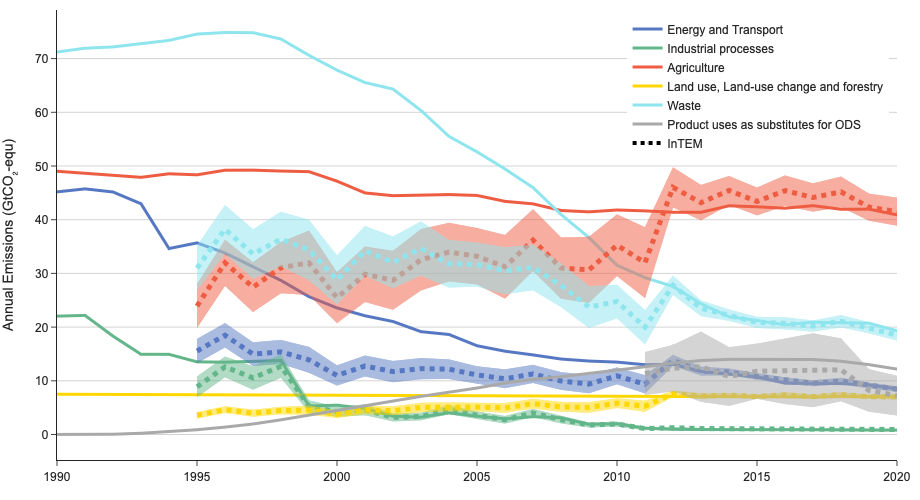

In [47]:
fig2 = go.Figure()

alpha = 0.6
color_1 = ["rgba(86, 119, 194, 1)", f"rgba(86, 119, 194, {alpha})"]
color_2 = ["rgba(99, 182, 137, 1)", f"rgba(99, 182, 137, {alpha})"]
color_3 = ["rgba(238,92,66, 1)", f"rgba(238,92,66, {alpha})"]
color_4 = ["rgba(255,215,0, 1)", f"rgba(255,215,0, {alpha})"]
color_5 = ["rgba(142,229,238, 1)", f"rgba(142,229,238, {alpha})"]
color_6 = ["rgba(169,169,169, 1)", f"rgba(169,169,169, {alpha})"]
color_7 = ["rgba(0, 0, 0, 1)", f"rgba(0, 0, 0, {alpha})"]

date_range = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
#date_range = ["2019-03-01", "2019-06-01"]

def errorbars(df, var, color, dash, name, showlegend=False):

    error_minus=df[var] - df[f"{var}_std"]
    error_plus=df[var] + df[f"{var}_std"]

    fig2.add_trace(go.Scatter(
        x=date_range,
        y=error_minus.values,
        fill=None,
        mode='lines',
        line=dict(color=color[1], width=0.1),
        showlegend=False,
        hoverinfo='skip'
        ))

    fig2.add_trace(go.Scatter(
        x=date_range,
        y=error_plus.values,
        fill="tonexty",
        mode='lines',
        line=dict(color=color[1], width=0.1),
        showlegend=False,
        hoverinfo='skip'
        ))
    
    fig2.add_trace(go.Scatter(
        x=date_range,
        y=df[var],
        mode="lines",
        line=dict(color=color[0], dash="dot", width = 0.1),
        showlegend=showlegend,
        name=name,
        hovertemplate = 'InTEM %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
        ))

fig2.add_trace(go.Scatter(
    x=date_range,
    y=energy_both,
    mode='lines',
    line=dict(color=color_1[0], width=3.),
    showlegend=True,
    hovertemplate = 'Inventory Energy %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="Energy and Transport",
    ))

fig2.add_trace(go.Scatter(
    x=date_range,
    y=industrial_both,
    mode='lines',
    line=dict(color=color_2[0], width=3.),
    showlegend=True,
    hovertemplate = 'Inventory Industrial Processes %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="Industrial processes",
    ))

fig2.add_trace(go.Scatter(
    x=date_range,
    y=agricultural_both,
    mode='lines',
    line=dict(color=color_3[0], width=3.),
    showlegend=True,
    hovertemplate = 'Inventory Agriculture %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="Agriculture",
    ))

fig2.add_trace(go.Scatter(
    x=date_range,
    y=LULUCF_both,
    mode='lines',
    line=dict(color=color_4[0], width=3.),
    showlegend=True,
    hovertemplate = 'Inventory LULUCF %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="Land use, Land-use change and forestry",
    ))

fig2.add_trace(go.Scatter(
    x=date_range,
    y=waste_both,
    mode='lines',
    line=dict(color=color_5[0], width=3.),
    showlegend=True,
    hovertemplate = 'Inventory Waste %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="Waste",
    ))

errorbars(energy_both_intem, "InTEM_Energy", color_1, None, "InTEM")
fig2.add_trace(go.Scatter(
    x=date_range,
    y=energy_both_intem["InTEM_Energy"],
    mode='lines',
    line=dict(color=color_1[0], dash="dot", width=5),
    showlegend=False,
    hovertemplate = 'InTEM Energy %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="Energy",
    ))

errorbars(industrial_both_intem, "InTEM_Industry", color_2, None, "InTEM")
fig2.add_trace(go.Scatter(
    x=date_range,
    y=industrial_both_intem["InTEM_Industry"],
    mode='lines',
    line=dict(color=color_2[0], dash="dot", width=5),
    showlegend=False,
    hovertemplate = 'InTEM Industrial Processes %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="Industrial processes",
    ))

errorbars(agricultural_both_intem, "InTEM_Agriculture", color_3, None, "InTEM")
fig2.add_trace(go.Scatter(
    x=date_range,
    y=agricultural_both_intem["InTEM_Agriculture"],
    mode='lines',
    line=dict(color=color_3[0], dash="dot", width=5),
    showlegend=False,
    hovertemplate = 'InTEM Agriculture %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="Agriculture",
    ))

errorbars(LULUCF_both_intem, "InTEM_LULUCF", color_4, None, "InTEM")
fig2.add_trace(go.Scatter(
    x=date_range,
    y=LULUCF_both_intem["InTEM_LULUCF"],
    mode='lines',
    line=dict(color=color_4[0], dash="dot", width=5),
    showlegend=False,
    hovertemplate = 'InTEM LULUCF %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="Land use, Land-use change and forestry",
    ))

errorbars(waste_both_intem, "InTEM_Waste", color_5, None, "InTEM")
fig2.add_trace(go.Scatter(
    x=date_range,
    y=waste_both_intem["InTEM_Waste"],
    mode='lines',
    line=dict(color=color_5[0], dash="dot", width=5),
    showlegend=False,
    hovertemplate = 'InTEM Waste %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="Waste",
    ))

#fig2.add_trace(go.Scatter(
#    x=date_range,
#    y=invent_fgas_1["Total"],
#    mode='lines',
#    line=dict(color=color_6[0], width=3.),
#    showlegend=True,
#    hovertemplate = 'Inventory F Gases %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
#    name="F Gases",
#    ))

fig2.add_trace(go.Scatter(
    x=date_range,
    y=df_test["ODS"],
    mode='lines',
    line=dict(color=color_6[0], width=3.),
    showlegend=True,
    hovertemplate = 'Inventory Product uses as substitutes for ODS %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="Product uses as substitutes for ODS",
    ))

#errorbars(df_fgas, "InTEM", color_6, None, "InTEM")
#fig2.add_trace(go.Scatter(
#    x=date_range,
#    y=df_fgas["InTEM"],
#    mode='lines',
#    line=dict(color=color_6[0], dash = "dot",  width=5),
#    showlegend=False,
#    hovertemplate = 'InTEM F Gases %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
#    name="F Gases",
#    ))

errorbars(df_fgas, "InTEM_ODS", color_6, None, "InTEM")
fig2.add_trace(go.Scatter(
    x=date_range,
    y=df_fgas["InTEM_ODS"],
    mode='lines',
    line=dict(color=color_6[0], dash = "dot",  width=5),
    showlegend=False,
    hovertemplate = 'InTEM F Gases %{x|%Y}: %{y:.0f} Gt yr⁻¹<extra></extra>',
    name="F Gases",
    ))


fig2.add_trace(go.Scatter(
    x=[pd.Timestamp("1900-01-01"), pd.Timestamp("1900-01-02")],
    y=[0., 0.],
    line=dict(color="black", dash="dot", width=4),
    marker=dict(opacity=0., size=0),
    showlegend=True,
    name="InTEM"
    ))
    
fig2.update_layout(
    yaxis_title="Annual Emissions (GtCO₂-equ)",
    template="simple_white",
    autosize=False,
    width=750,
    height=500,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99,
        traceorder="normal"),
    margin=dict(l=55, r=10, t=10, b=40),
    # paper_bgcolor='rgba(0,0,0,0)',
    # plot_bgcolor='rgba(0,0,0,0)'
)
    


fig2.update_yaxes(showgrid=True, gridwidth=1, gridcolor='Lightgrey')

fig2.layout.font.size=12
fig2.layout.font.family="Arial"

#fig2.write_image("Annual_Emissions_by_sector.png")
#fig2.write_image("Annual_Emissions_by_sector.pdf")
fig2.write_html("Annual_Emissions_by_sector.html")

fig2.show()

In [34]:
from dash import dcc

In [43]:
dcc.Graph(id='fig2', style={'width': '90vw', 'height': '90vh'}) 

Graph(id='fig2', style={'width': '90vw', 'height': '90vh'})

In [49]:
from IPython.display import display, HTML, IFrame, Image

Here is a diagram showing the locations of all the sites associated with the DECC network:

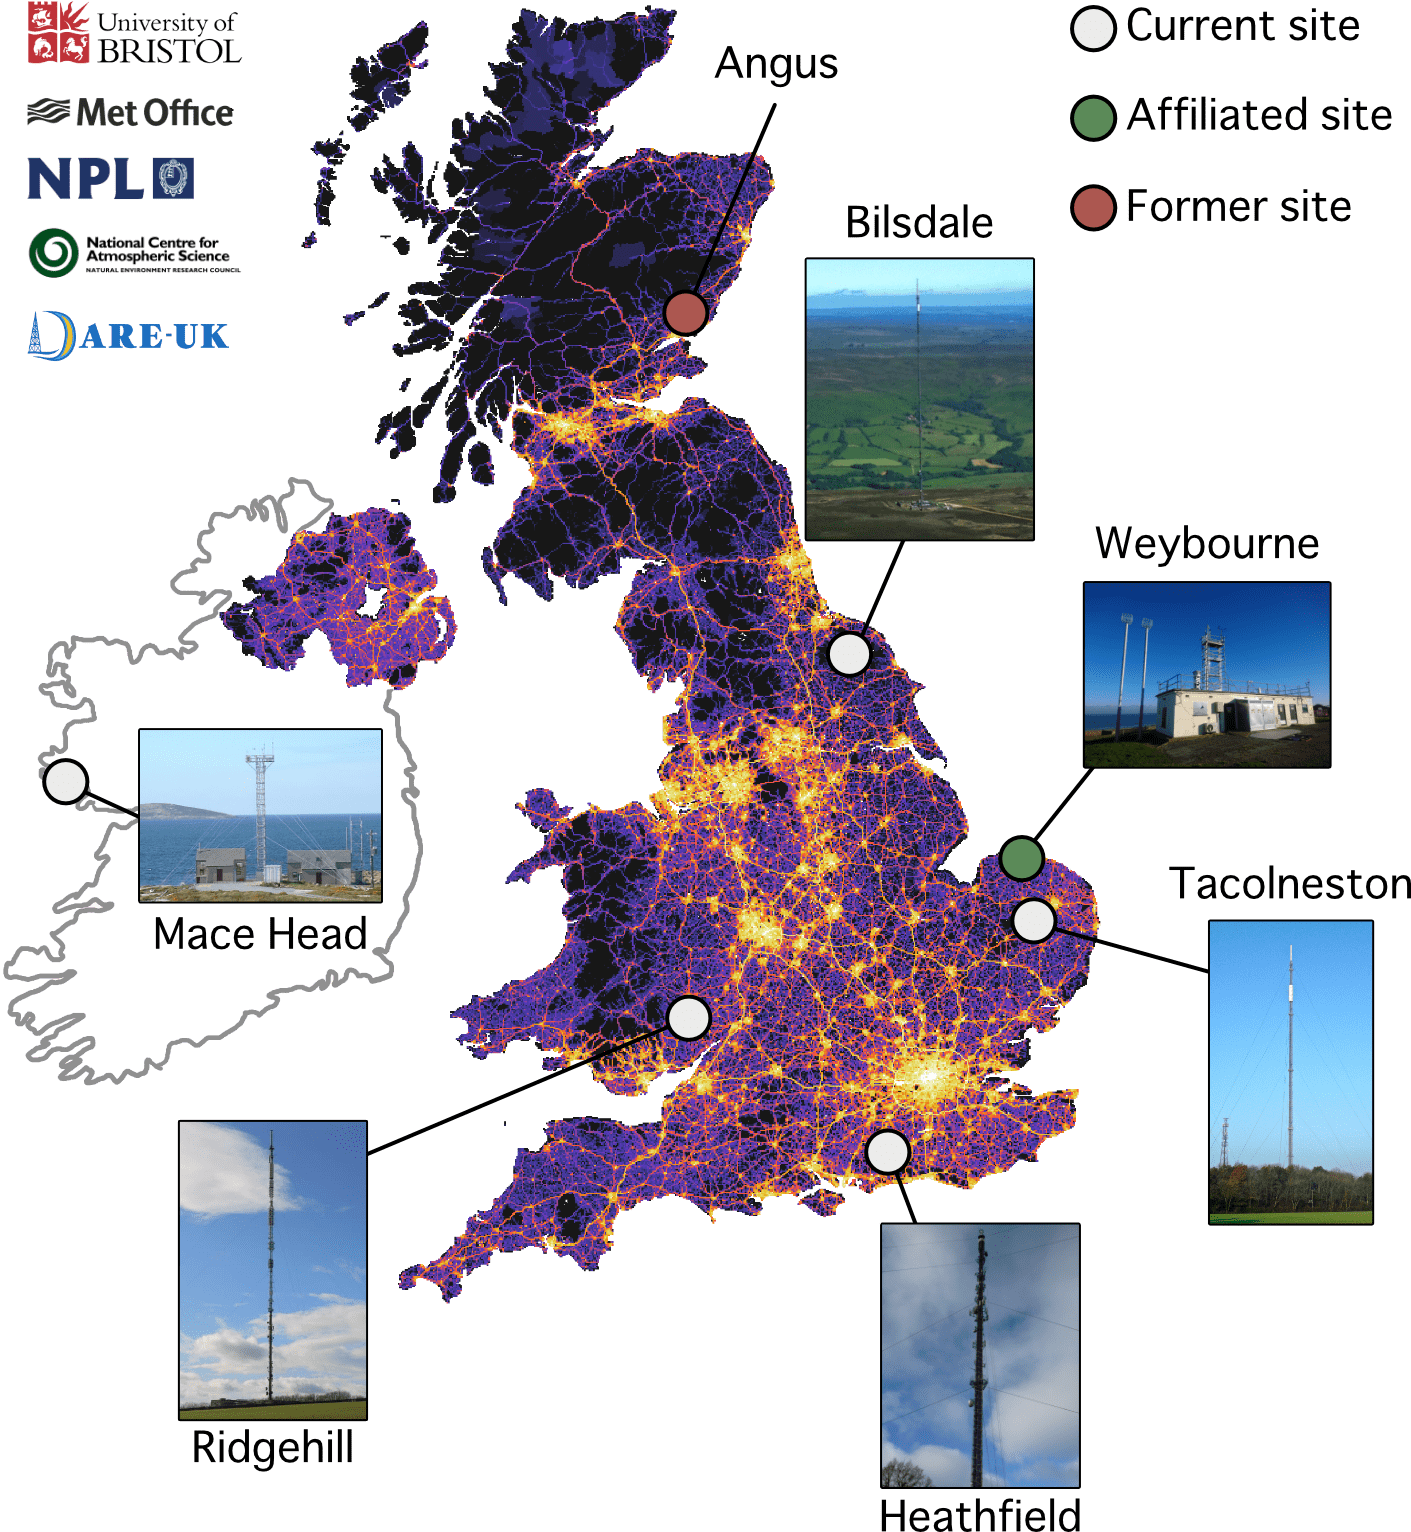

In [50]:
display(Image("UKDECCnetwork_2021.png", width = 700, height = 800))